In [308]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.linear_model import LinearRegression
import numpy as np

In [309]:
df = pd.read_csv('Sport car price.csv')

In [310]:
df

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"
...,...,...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,5,1280,1106,2.5,"3,000,000"
1003,Lotus,Evija,2021,Electric Motor,1972,1254,2,"2,000,000"
1004,McLaren,Senna,2021,4,789,590,2.7,"1,000,000"
1005,Pagani,Huayra,2021,6,764,738,3,"2,600,000"


In [311]:
df = df.drop(["Car Make","Car Model"], axis=1)


In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Year                     1007 non-null   int64 
 1   Engine Size (L)          997 non-null    object
 2   Horsepower               1007 non-null   object
 3   Torque (lb-ft)           1004 non-null   object
 4   0-60 MPH Time (seconds)  1007 non-null   object
 5   Price (in USD)           1007 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.3+ KB


In [314]:
df.isnull().sum()

Year                        0
Engine Size (L)            10
Horsepower                  0
Torque (lb-ft)              3
0-60 MPH Time (seconds)     0
Price (in USD)              0
dtype: int64

In [315]:
df['Engine Size (L)']= df['Engine Size (L)'].ffill()
df['Torque (lb-ft)']=df['Torque (lb-ft)'].ffill()

In [316]:
df.isnull().sum()

Year                       0
Engine Size (L)            0
Horsepower                 0
Torque (lb-ft)             0
0-60 MPH Time (seconds)    0
Price (in USD)             0
dtype: int64

In [317]:
df['Price (in USD)'] = df['Price (in USD)'].str.replace(',', '').astype(float)



In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     1007 non-null   int64  
 1   Engine Size (L)          1007 non-null   object 
 2   Horsepower               1007 non-null   object 
 3   Torque (lb-ft)           1007 non-null   object 
 4   0-60 MPH Time (seconds)  1007 non-null   object 
 5   Price (in USD)           1007 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 47.3+ KB


In [319]:
problematic_values = df[df['0-60 MPH Time (seconds)'].str.contains("<|>|[^0-9.]")]
print(problematic_values)


     Year Engine Size (L) Horsepower Torque (lb-ft) 0-60 MPH Time (seconds)  \
364  2023        Electric     1,000+            737                   < 1.9   

     Price (in USD)  
364        200000.0  


In [320]:
df['0-60 MPH Time (seconds)'] = df['0-60 MPH Time (seconds)'].str.replace('<', ' ').astype(float)

In [321]:
df['Horsepower'] = df['Horsepower'].str.replace(',', '+',' ', regex=False).astype(float)


In [322]:
df['Engine Size (L)'] = df['Engine Size (L)'].str.replace('.', 'Electric Motor',' ', regex=False).astype(float)

In [323]:
df['Torque (lb-ft)'] = df['Torque (lb-ft)'].astype(str)
df['Torque (lb-ft)'] = df['Torque (lb-ft)'].replace('-', np.nan)
df['Torque (lb-ft)'] = pd.to_numeric(df['Torque (lb-ft)'], errors='coerce')
df['Torque (lb-ft)'].fillna(df['Torque (lb-ft)'].mean())


0        331.0
1        443.0
2        561.0
3        406.0
4        568.0
         ...  
1002    1106.0
1003    1254.0
1004     590.0
1005     738.0
1006    1696.0
Name: Torque (lb-ft), Length: 1007, dtype: float64

In [324]:
df['Price (in USD)'] = df['Price (in USD)'].fillna(df['Price (in USD)'].mean())
df['Horsepower'] = df['Horsepower'].fillna(df['Horsepower'].mean())


In [325]:
print(df[['Horsepower','Year','Engine Size (L)','Torque (lb-ft)','0-60 MPH Time (seconds)','Price (in USD)']].isna().sum())


Horsepower                 1007
Year                          0
Engine Size (L)            1007
Torque (lb-ft)                5
0-60 MPH Time (seconds)       0
Price (in USD)                0
dtype: int64


In [326]:
df['Horsepower'] = df['Horsepower'].fillna(0)

In [327]:
print(df[['Horsepower']].isna().sum())


Horsepower    0
dtype: int64


In [328]:
X = df[['Horsepower']].values
y = df['Price (in USD)'].values
model = LinearRegression()
model.fit(X, y)

print(f"Coefficient: {model.coef_[0]}, Intercept: {model.intercept_}")

Coefficient: 0.0, Intercept: 382035.9414101291


In [329]:
df['Engine Size (L)'] = df['Engine Size (L)'].fillna(0)

In [330]:
print(df[['Engine Size (L)']].isna().sum())

Engine Size (L)    0
dtype: int64


In [331]:
X = df[['Engine Size (L)']].values
y = df['Price (in USD)'].values
model = LinearRegression()
model.fit(X, y)

print(f"Coefficient: {model.coef_[0]}, Intercept: {model.intercept_}")

Coefficient: 0.0, Intercept: 382035.9414101291


In [332]:
print(df['Engine Size (L)'].dtype)
print(df['Horsepower'].dtype)

float64
float64


In [333]:
print(df['Engine Size (L)'].nunique()) 
print(df['Horsepower'].nunique())  

1
1


In [334]:
X = df[['0-60 MPH Time (seconds)']].values
y = df['Price (in USD)'].values
model = LinearRegression()
model.fit(X, y)

print(f"Coefficient: {model.coef_[0]}, Intercept: {model.intercept_}")

Coefficient: -471785.9373033466, Intercept: 2039611.558271341


Text(0.5, 1.0, 'Scatterplot showing the relationship between the Price and MPH(seconds)')

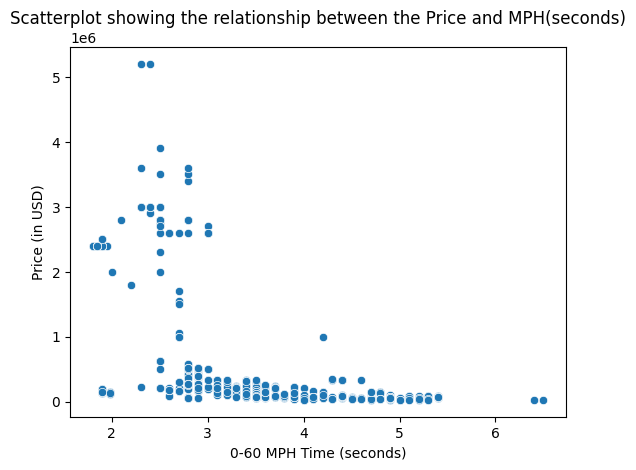

In [335]:
sns.scatterplot(x=df['0-60 MPH Time (seconds)'], y = df['Price (in USD)'])
plt.title("Scatterplot showing the relationship between the Price and MPH(seconds)")


In [336]:
X = df[['Year']].values
y = df['Price (in USD)'].values
model = LinearRegression()
model.fit(X, y)

print(f"Coefficient: {model.coef_[0]}, Intercept: {model.intercept_}")

Coefficient: -11485.070784111334, Intercept: 23595679.25863059


In [337]:
df = df.dropna(subset=['Torque (lb-ft)', 'Price (in USD)'])
X = df[['Torque (lb-ft)']].values
y = df['Price (in USD)'].values
model.fit(X, y)


LinearRegression()

In [338]:
X = df[['Torque (lb-ft)']].values
y = df['Price (in USD)'].values
model = LinearRegression()
model.fit(X, y)

print(f"Coefficient: {model.coef_[0]}, Intercept: {model.intercept_}")

Coefficient: 2212.335106646064, Intercept: -820440.2488156453


Text(0.5, 1.0, 'Scatterplot showing the relationship between the Price and Torque')

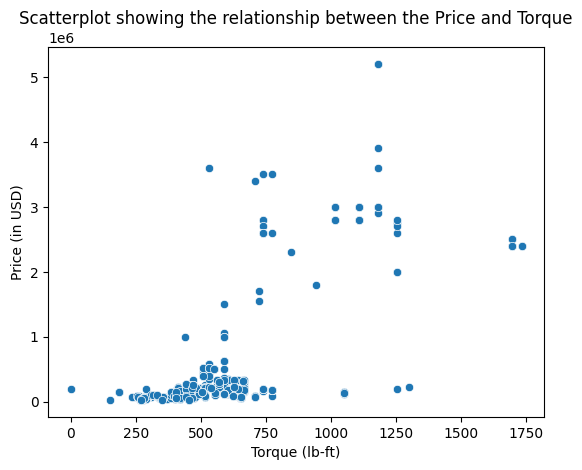

In [339]:
sns.scatterplot(x=df['Torque (lb-ft)'], y = df['Price (in USD)'])
plt.title("Scatterplot showing the relationship between the Price and Torque")